In [66]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
import math
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import os
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model
import warnings
warnings.filterwarnings('ignore')
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
import os
from sklearn.metrics import classification_report
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import average_precision_score, matthews_corrcoef
import warnings
from imblearn.over_sampling import SMOTE, ADASYN
warnings.filterwarnings('ignore')
import matplotlib
import sklearn
from IPython.display import HTML
#from IPython.display import YouTubeVideo
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
import pickle
import os
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

# Import Data

Using the full dataset that is not split into train/val/test

In [67]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../../"))
data = pd.read_csv(relative_path+'/preprocessed_data/non_split_dataset/total_subset.csv')
data = data.drop(['evil'],axis=1)
print(data.shape)

a:\Desktop\FYP Final Files\notebooks\Supervised_ML
(1141078, 8)


In [68]:
data.head(1)

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus
0,1,0,0,1,157,5,0,1


Dropping target feature

In [69]:
X = data.drop(['sus'],axis=1)
y = data['sus']

Quick look at the data

In [70]:
X.head(5)

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue
0,1,0,0,1,157,5,0
1,1,0,0,1,3,1,0
2,1,0,0,1,1010,0,0
3,1,1,0,0,21,2,2
4,1,1,0,0,1005,4,0


In [71]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: sus, dtype: int64

# Helper function that will assist in printing the metrics

In [72]:
def print_metrics(y_true, y_predicted):

    accuracy = accuracy_score(y_true, y_predicted)   
    metrics_results = precision_recall_fscore_support(y_true, y_predicted, average="weighted", pos_label=1)
    average_precision = average_precision_score(y_true, y_predicted)
    balanced_accuracy = balanced_accuracy_score(y_true, y_predicted)
    mcc = matthews_corrcoef(y_true, y_predicted)
    
    print(f'Accuracy:\t{accuracy:.3f}')
    print(f'Precision:\t{metrics_results[0]}')
    print(f'Recall:\t\t{metrics_results[1]:.3f}')
    print(f'F1-Score:\t{metrics_results[2]:.3f}')
    print("Average Precision Score:", average_precision)
    print("Balanced Accuracy Score:", balanced_accuracy)
    print("Matthews Correlation Coefficient (MCC):", mcc)
    print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_true , y_predicted)))
    
    # make confusion matrix
    confusion_matrixs = confusion_matrix(y_true, y_predicted)
    

    TP = confusion_matrixs[1][1]
    TN = confusion_matrixs[0][0]
    FP = confusion_matrixs[0][1]
    FN = confusion_matrixs[1][0]


    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrixs, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)

    # Print roc curve
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_predicted)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, )
    display.plot()
    plt.show()


    precision, recall, _ = precision_recall_curve(y_true, y_predicted)

    # Calculate the area under the curve
    pr_auc = auc(recall, precision)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

# Split the dataset into training and testing

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=0)

# Lets get a baseline score

### Logistic Regression

Define and fit model to training data

In [74]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

Predict on test data

In [75]:
y_pred = logistic_regression.predict(X_test)

Lets print the metrics

Accuracy:	0.991
Precision:	0.9912059022747074
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9506556351341342
Balanced Accuracy Score: 0.9708846584546473
Matthews Correlation Coefficient (MCC): 0.9653993040543659
AUC : 0.97088


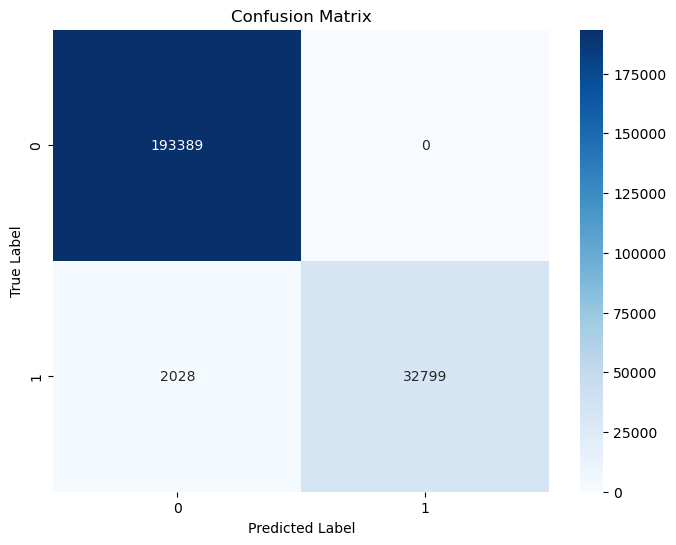

True Positives (TP): 32799
True Negatives (TN): 193389
False Positives (FP): 0
False Negatives (FN): 2028


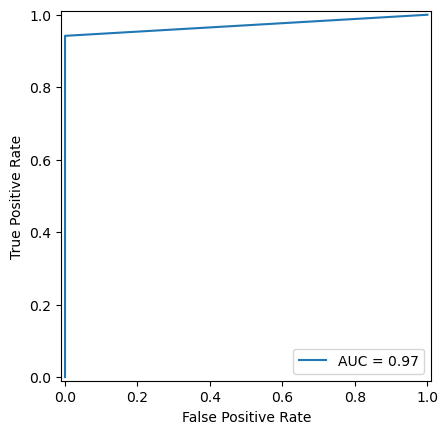

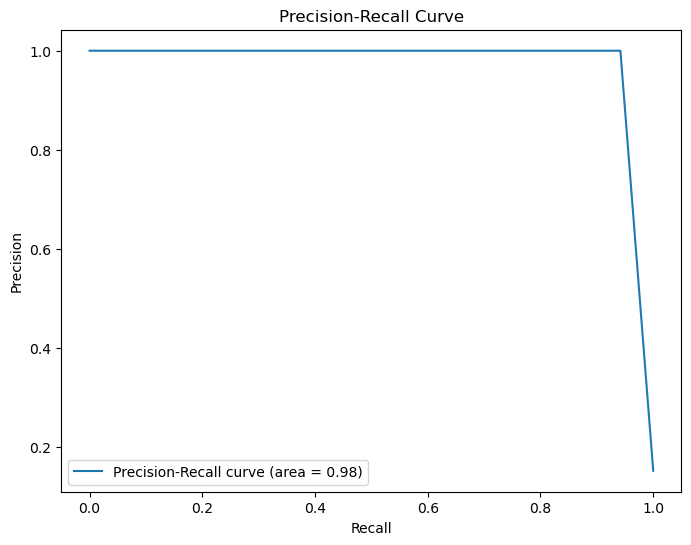

In [76]:
print_metrics(y_test,y_pred)

# Dealing with class imbalance
We are getting great scores but lets see if we can mess with the class imbalance and get an even better score

Splitting the data from the orignal set before any data manipulation

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

Lets see what our data looks like now

In [78]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 7)   X_train
(228216, 7)   X_test
(912862,)   y_train
(228216,)   y_test


## Under Sampling

In [79]:
underSampler = RandomUnderSampler(random_state=0)
X_under_sampled_train , y_under_sampled_train = underSampler.fit_resample(X_train,y_train)

Lets see what our data looks like now

In [80]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_under_sampled_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    138687
1    138687
Name: count, dtype: int64


Train a logistic regression model on our undersampled data

In [81]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_under_sampled_train,y_under_sampled_train)

LogisticRegression()

In [82]:
# cv_predictions = cross_val_predict(logistic_regression, X_under_sampled_train, y_under_sampled_train, cv=5)
# # Calculate evaluation metrics
# cv_accuracy = accuracy_score(y_under_sampled_train, cv_predictions)
# cv_precision = precision_score(y_under_sampled_train, cv_predictions)
# cv_recall = recall_score(y_under_sampled_train, cv_predictions)
# cv_f1_score = f1_score(y_under_sampled_train, cv_predictions)

In [83]:
# # Print the cross-validation scores
# print("Cross-Validation Metrics:")
# print("Accuracy:", cv_accuracy)
# print("Precision:", cv_precision)
# print("Recall:", cv_recall)
# print("F1 Score:", cv_f1_score)

And predict on untouched test data

In [84]:
y_pred = logistic_regression.predict(X_test)

Accuracy:	0.991
Precision:	0.9912059022747074
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9506556351341342
Balanced Accuracy Score: 0.9708846584546473
Matthews Correlation Coefficient (MCC): 0.9653993040543659
AUC : 0.97088


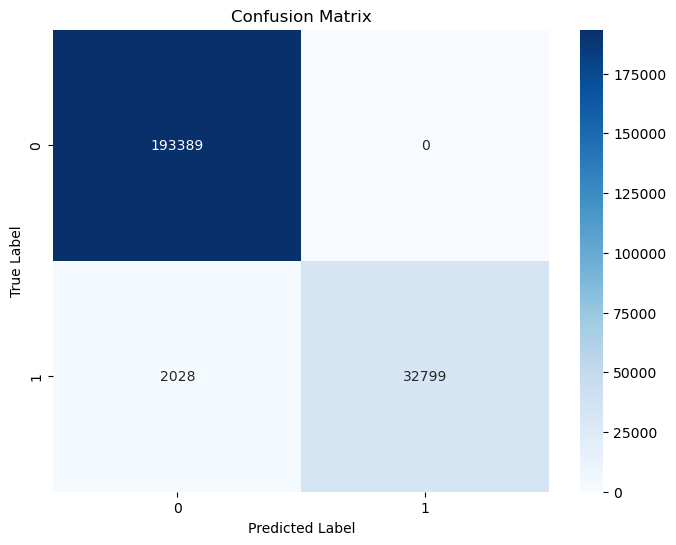

True Positives (TP): 32799
True Negatives (TN): 193389
False Positives (FP): 0
False Negatives (FN): 2028


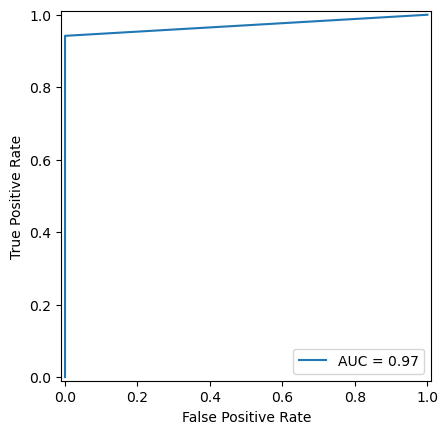

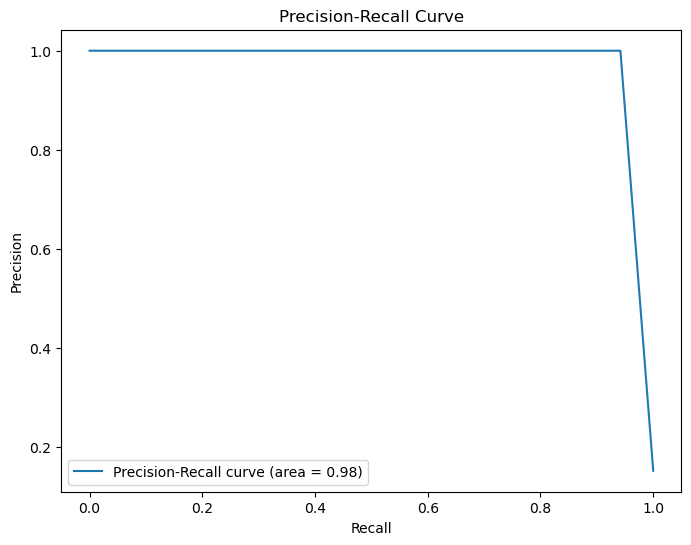

In [85]:
print_metrics(y_test,y_pred)

## Over Sampling

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [87]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 7)   X_train
(228216, 7)   X_test
(912862,)   y_train
(228216,)   y_test


In [88]:
overSampler = RandomOverSampler(random_state=0)
X_over_sampled_train , y_over_sampled_train = overSampler.fit_resample(X_train,y_train)

In [89]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_over_sampled_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    774175
1    774175
Name: count, dtype: int64


Train a logistic regression model on our over sampled data

In [90]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_over_sampled_train, y_over_sampled_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.991
Precision:	0.9912059022747074
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9506556351341342
Balanced Accuracy Score: 0.9708846584546473
Matthews Correlation Coefficient (MCC): 0.9653993040543659
AUC : 0.97088


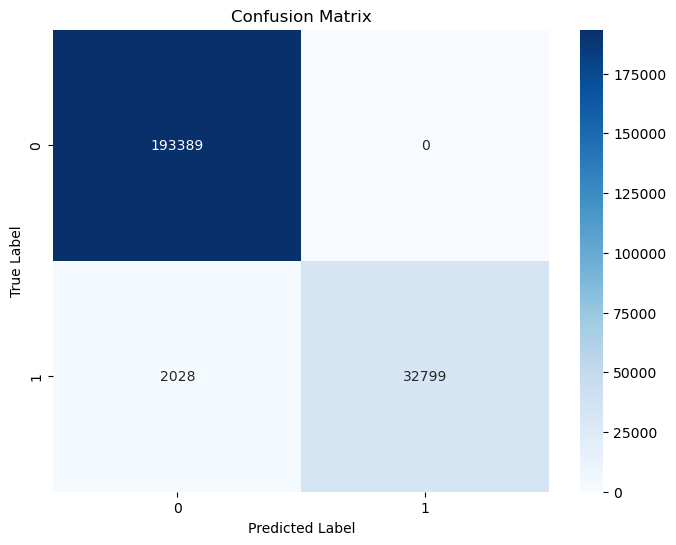

True Positives (TP): 32799
True Negatives (TN): 193389
False Positives (FP): 0
False Negatives (FN): 2028


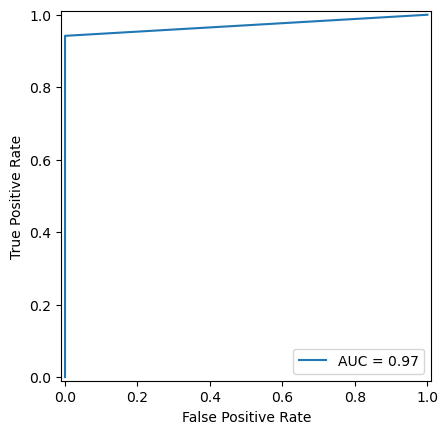

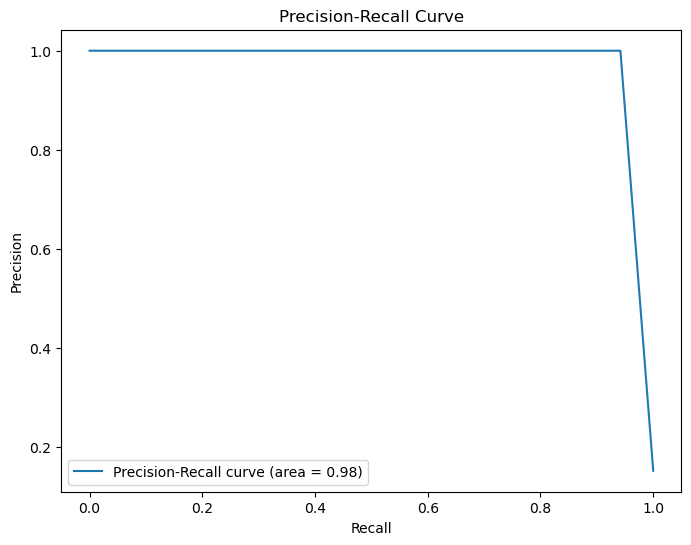

In [91]:
print_metrics(y_test,y_pred)

## Smote

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [93]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 7)   X_train
(228216, 7)   X_test
(912862,)   y_train
(228216,)   y_test


In [94]:
smote_OS = SMOTE(random_state=0)
X_smote_train , y_smote_train = smote_OS.fit_resample(X_train,y_train)

In [95]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_smote_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    774175
1    774175
Name: count, dtype: int64


Train a logistic regression model on SMOTE modified data

In [96]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_smote_train, y_smote_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.991
Precision:	0.9912059022747074
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9506556351341342
Balanced Accuracy Score: 0.9708846584546473
Matthews Correlation Coefficient (MCC): 0.9653993040543659
AUC : 0.97088


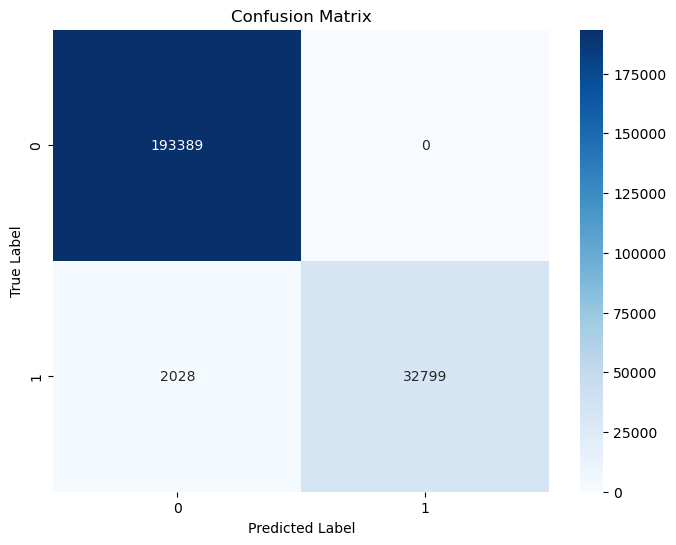

True Positives (TP): 32799
True Negatives (TN): 193389
False Positives (FP): 0
False Negatives (FN): 2028


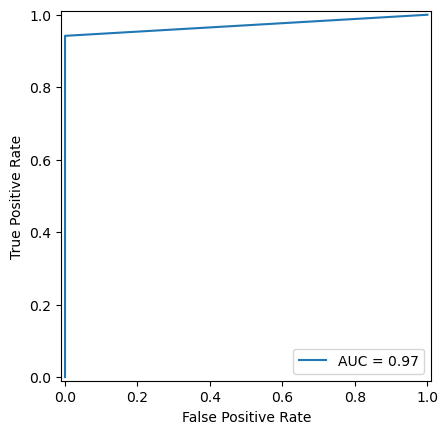

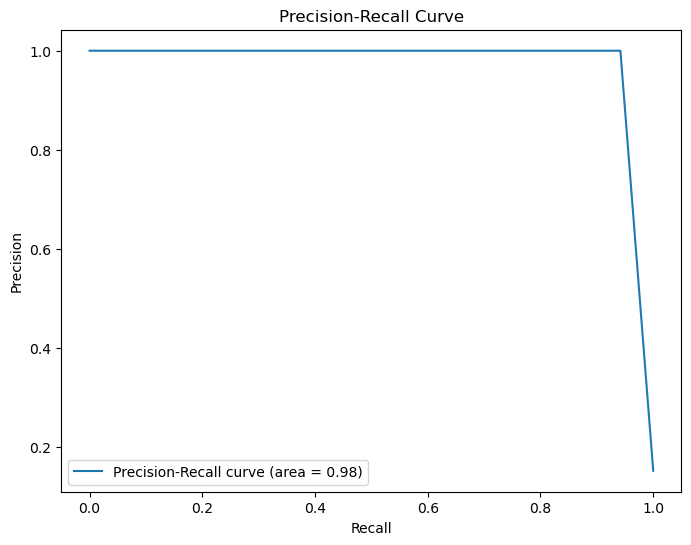

In [97]:
print_metrics(y_test,y_pred)

## Adasyn

In [98]:
adasyn = ADASYN(random_state=0)
X_adasyn_train , y_adasyn_train = adasyn.fit_resample(X_train,y_train)

In [99]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_adasyn_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
1    775952
0    774175
Name: count, dtype: int64


Train a logistic regression model on adasyn modified data

In [100]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_adasyn_train, y_adasyn_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.655
Precision:	0.8913181958737728
Recall:		0.655
F1-Score:	0.702
Average Precision Score: 0.30379108815142963
Balanced Accuracy Score: 0.7921035086558078
Matthews Correlation Coefficient (MCC): 0.4201953065483503
AUC : 0.79210


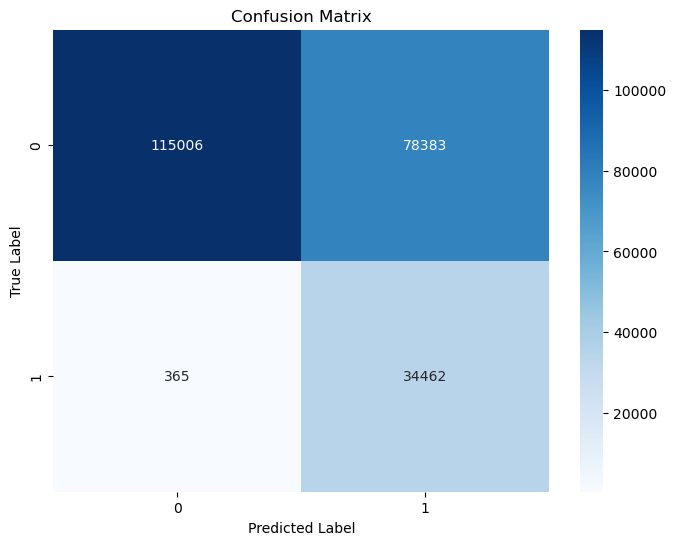

True Positives (TP): 34462
True Negatives (TN): 115006
False Positives (FP): 78383
False Negatives (FN): 365


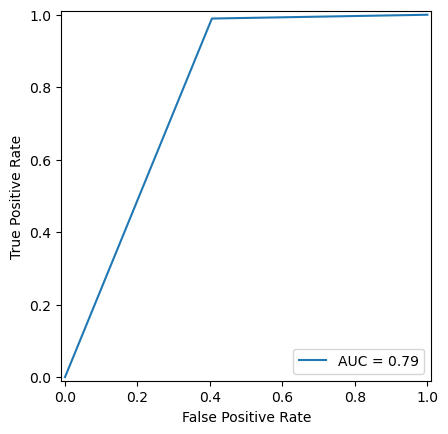

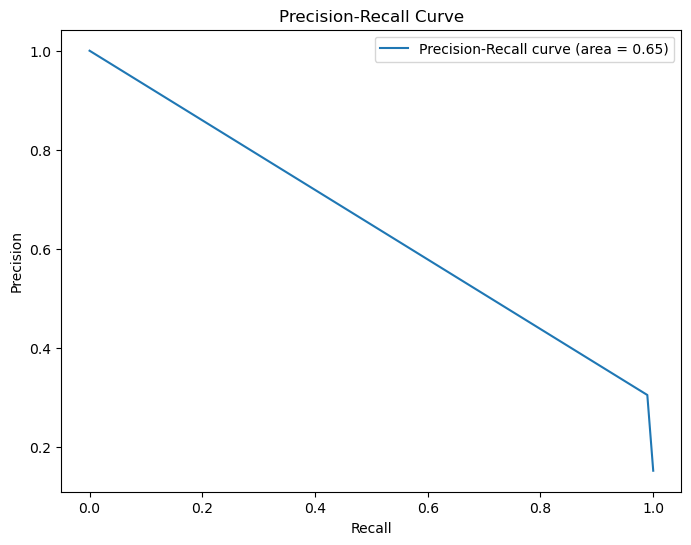

In [101]:
print_metrics(y_test,y_pred)

# Now that we have a baseline setup, lets try different models with the above data

- X_train, X_test - Original Data
- X_under_sampled_train , y_under_sampled_train - Under Sampled Data
- X_over_sampled_train , y_over_sampled_train - Over Sampled Data
- X_smote_train , y_smote_train - SMOTE modified Data
- X_adasyn_train , y_adasyn_train - ADASYN modified Data

## Decision Tree

In [102]:
# Declare Model
decision_tree = DecisionTreeClassifier(random_state=0)

### Original Data

Accuracy:	0.991
Precision:	0.9912194442460832
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9507135958367046
Balanced Accuracy Score: 0.97104802609727
Matthews Correlation Coefficient (MCC): 0.965464863588654
AUC : 0.97105


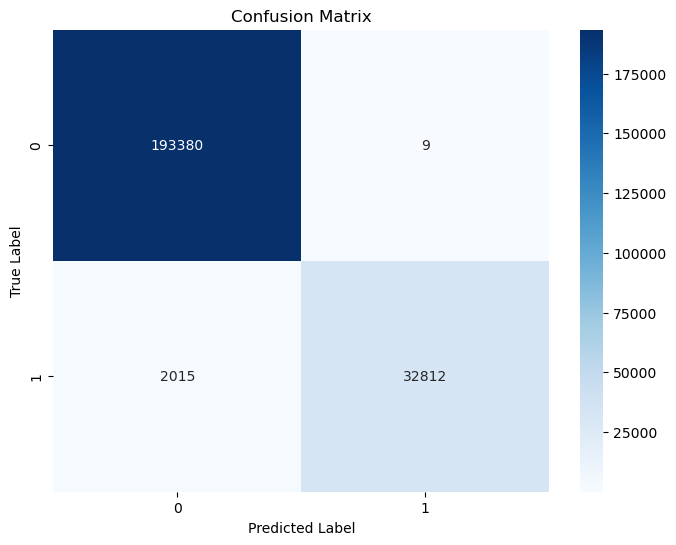

True Positives (TP): 32812
True Negatives (TN): 193380
False Positives (FP): 9
False Negatives (FN): 2015


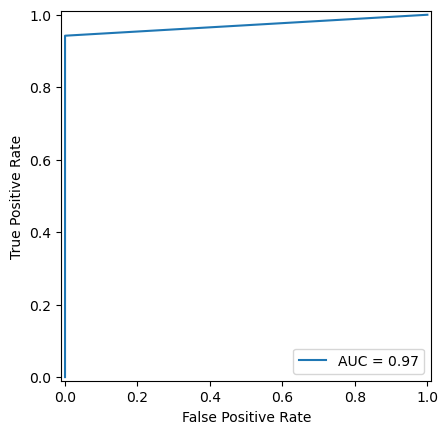

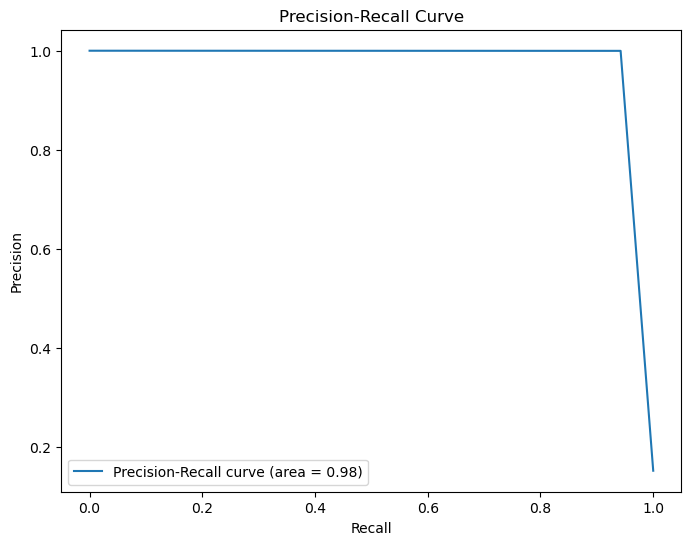

In [103]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.991
Precision:	0.9909232729566712
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9488174194277695
Balanced Accuracy Score: 0.9713872893723853
Matthews Correlation Coefficient (MCC): 0.9644031204252231
AUC : 0.97139


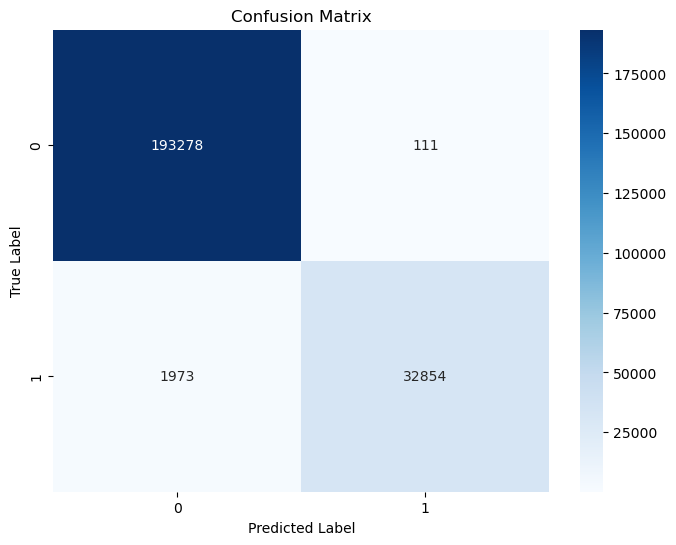

True Positives (TP): 32854
True Negatives (TN): 193278
False Positives (FP): 111
False Negatives (FN): 1973


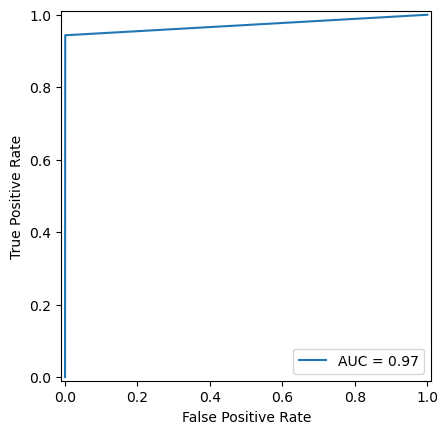

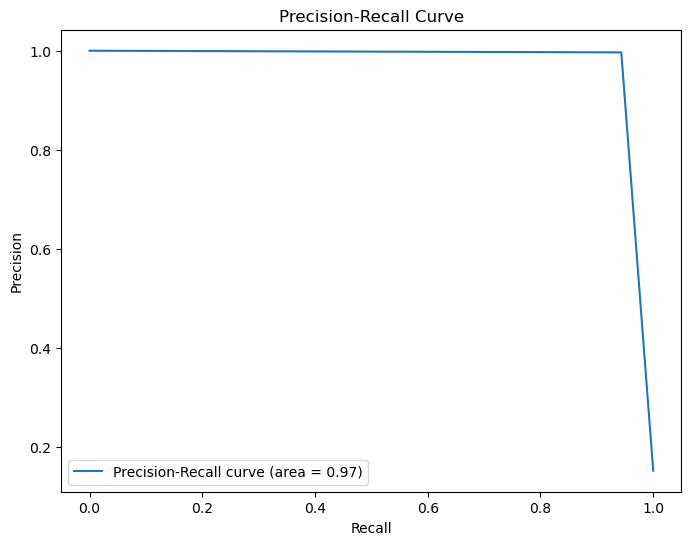

In [104]:
decision_tree.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.991
Precision:	0.9909232729566712
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9488174194277695
Balanced Accuracy Score: 0.9713872893723853
Matthews Correlation Coefficient (MCC): 0.9644031204252231
AUC : 0.97139


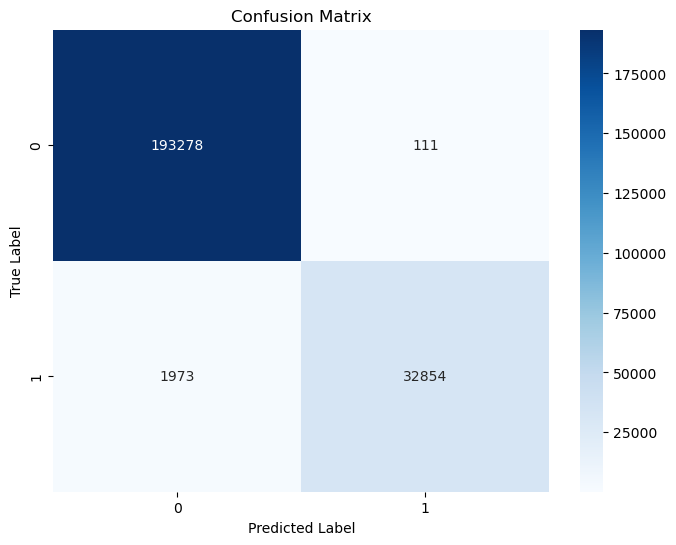

True Positives (TP): 32854
True Negatives (TN): 193278
False Positives (FP): 111
False Negatives (FN): 1973


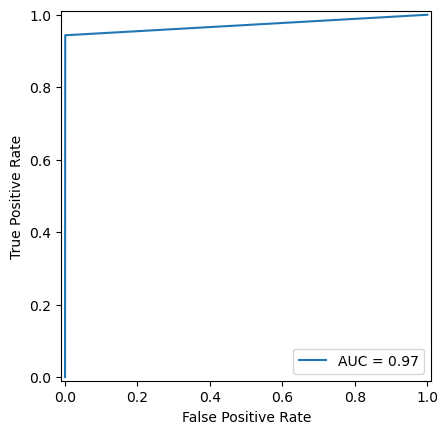

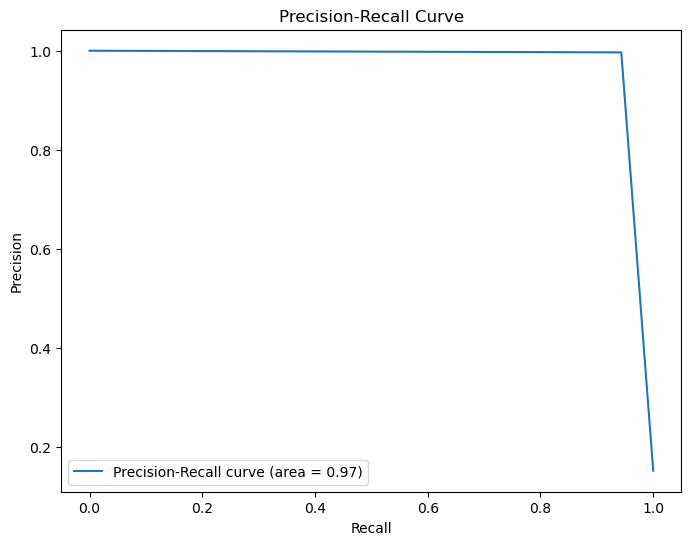

In [105]:
decision_tree.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.991
Precision:	0.9909232729566712
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9488174194277695
Balanced Accuracy Score: 0.9713872893723853
Matthews Correlation Coefficient (MCC): 0.9644031204252231
AUC : 0.97139


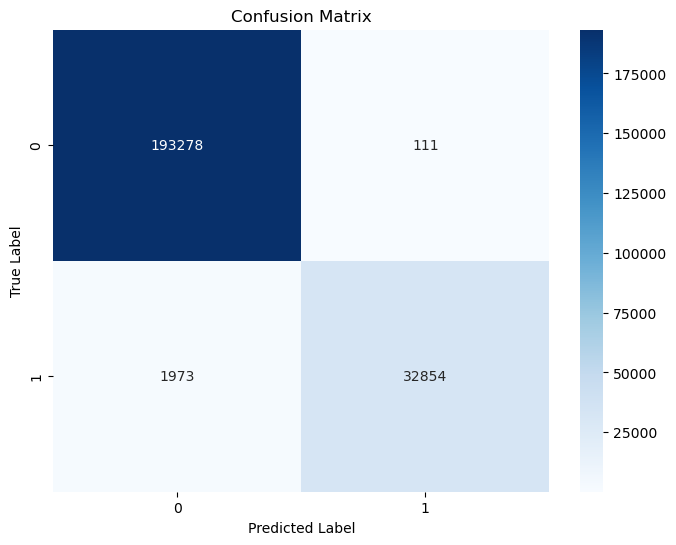

True Positives (TP): 32854
True Negatives (TN): 193278
False Positives (FP): 111
False Negatives (FN): 1973


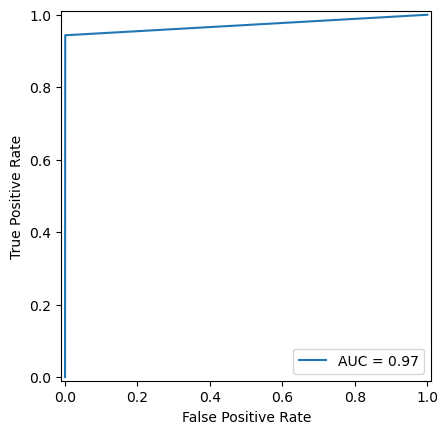

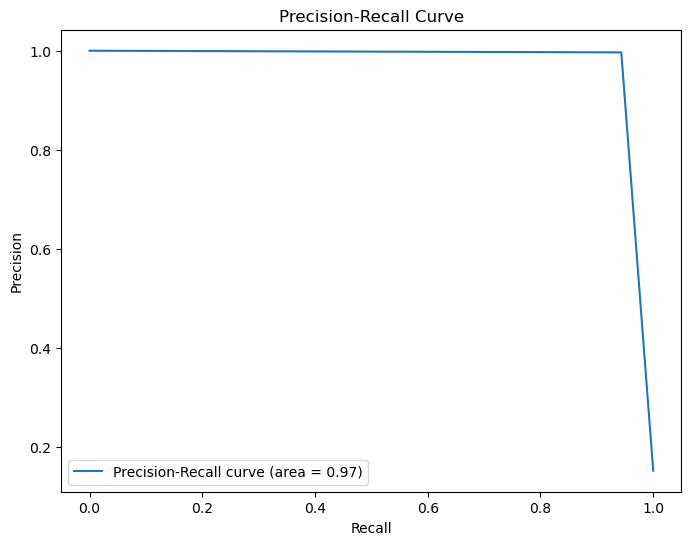

In [106]:
decision_tree.fit(X_smote_train, y_smote_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.778
Precision:	0.9054224944585596
Recall:		0.778
F1-Score:	0.808
Average Precision Score: 0.4011041171661816
Balanced Accuracy Score: 0.8611845841756403
Matthews Correlation Coefficient (MCC): 0.5384291062638558
AUC : 0.86118


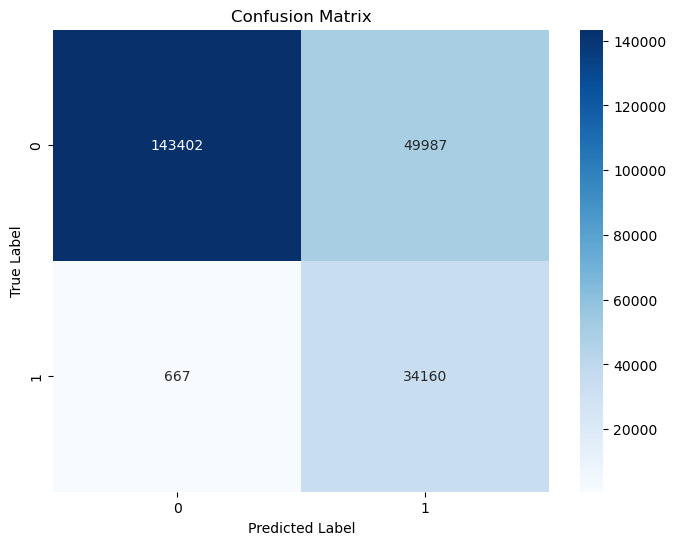

True Positives (TP): 34160
True Negatives (TN): 143402
False Positives (FP): 49987
False Negatives (FN): 667


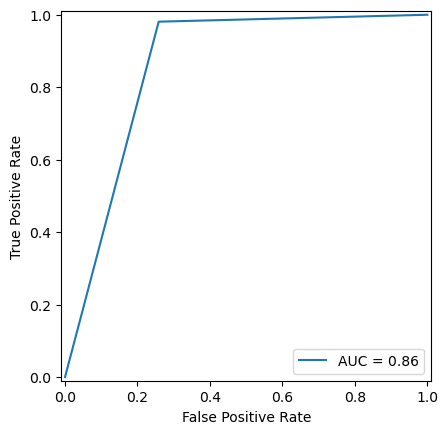

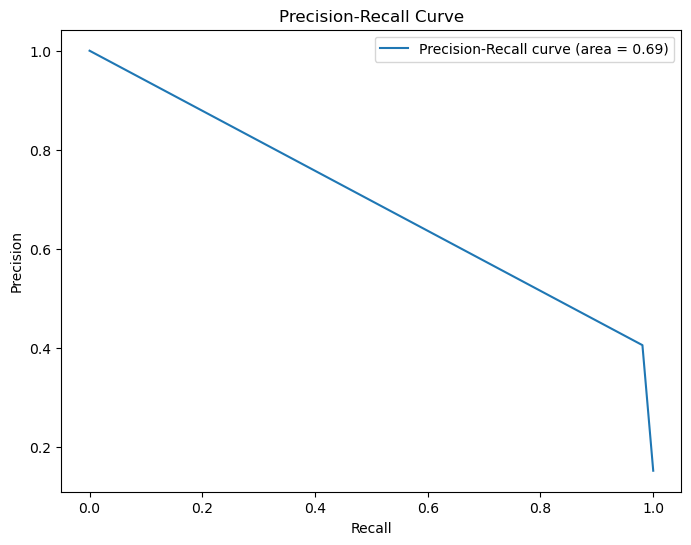

In [107]:
decision_tree.fit(X_adasyn_train, y_adasyn_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

## Random Forest

In [108]:
# Declare Random Forest Model
randomforest = RandomForestClassifier(random_state=0)

### Original Data

Accuracy:	0.991
Precision:	0.9912194442460832
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9507135958367046
Balanced Accuracy Score: 0.97104802609727
Matthews Correlation Coefficient (MCC): 0.965464863588654
AUC : 0.97105


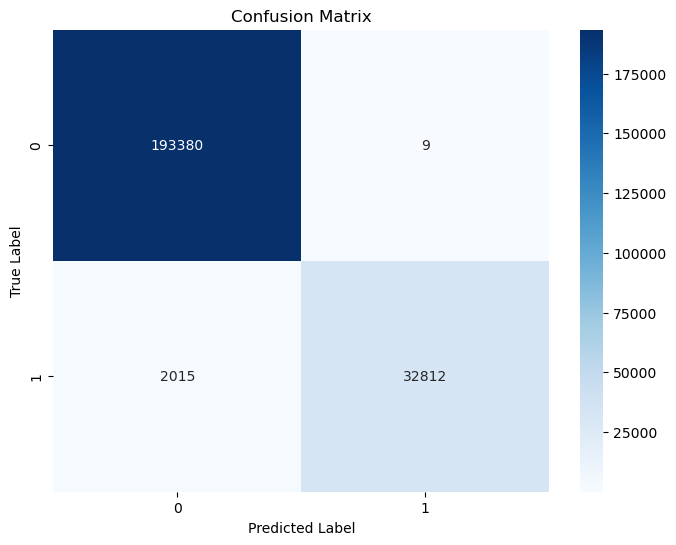

True Positives (TP): 32812
True Negatives (TN): 193380
False Positives (FP): 9
False Negatives (FN): 2015


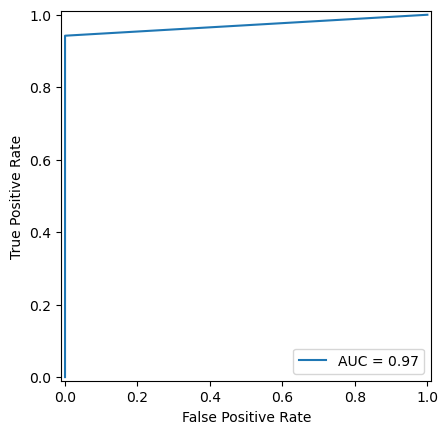

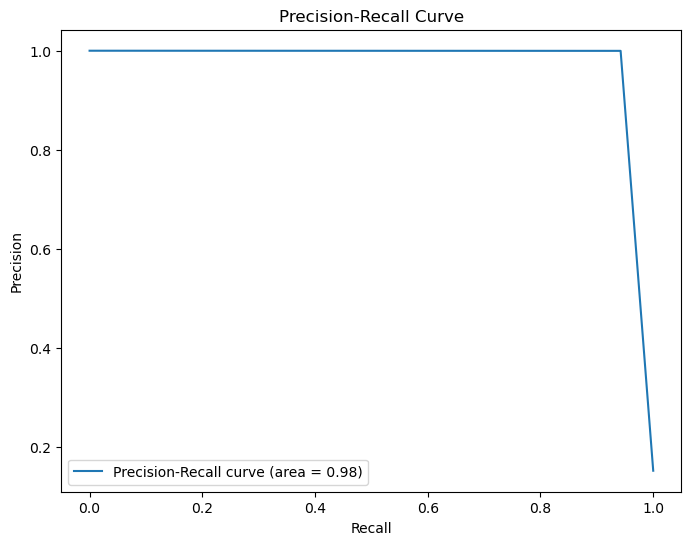

In [109]:
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.991
Precision:	0.9909232729566712
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9488174194277695
Balanced Accuracy Score: 0.9713872893723853
Matthews Correlation Coefficient (MCC): 0.9644031204252231
AUC : 0.97139


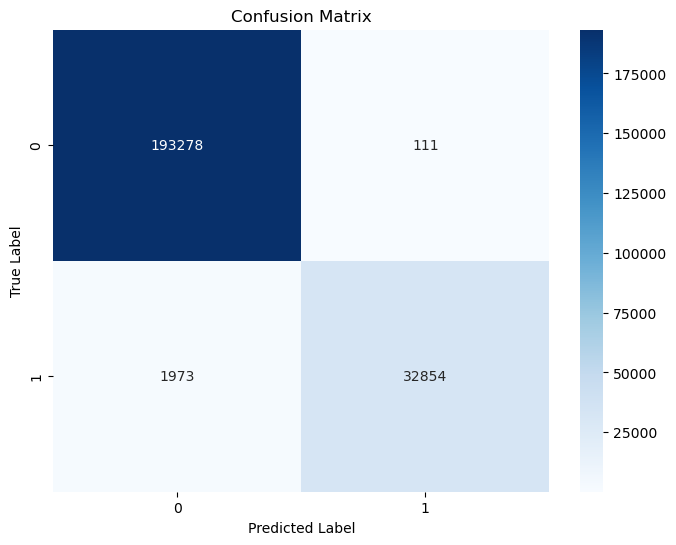

True Positives (TP): 32854
True Negatives (TN): 193278
False Positives (FP): 111
False Negatives (FN): 1973


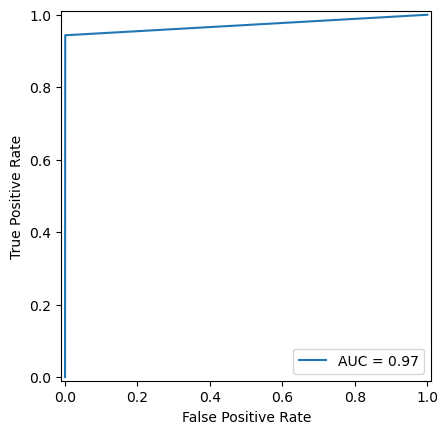

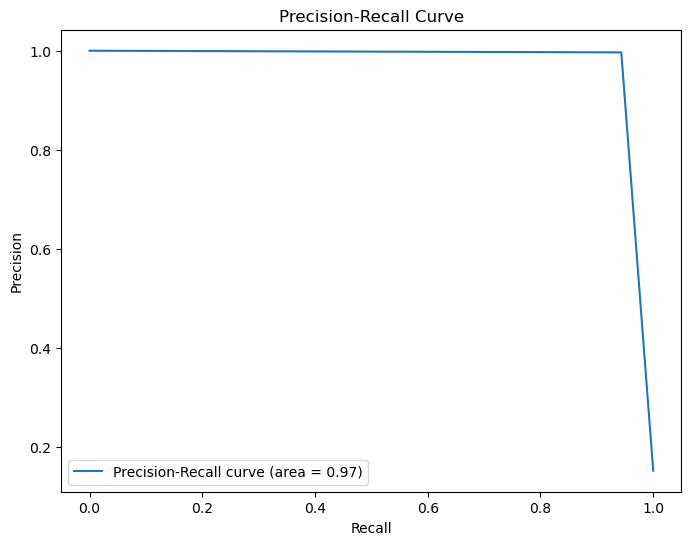

In [110]:
randomforest.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.991
Precision:	0.9909232729566712
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9488174194277695
Balanced Accuracy Score: 0.9713872893723853
Matthews Correlation Coefficient (MCC): 0.9644031204252231
AUC : 0.97139


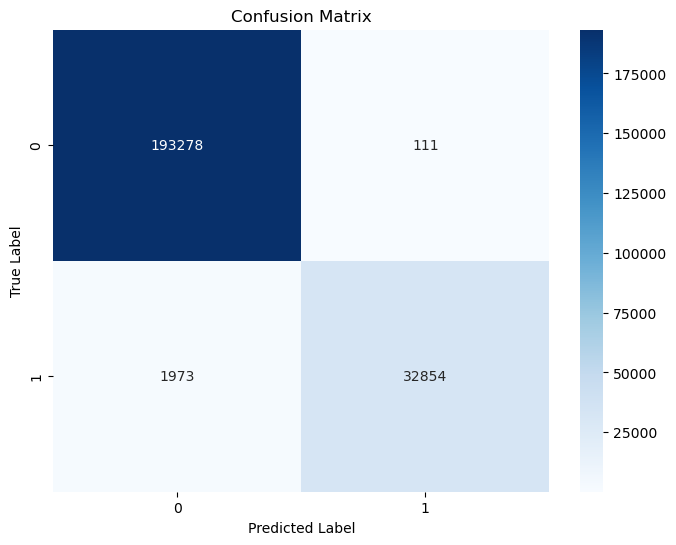

True Positives (TP): 32854
True Negatives (TN): 193278
False Positives (FP): 111
False Negatives (FN): 1973


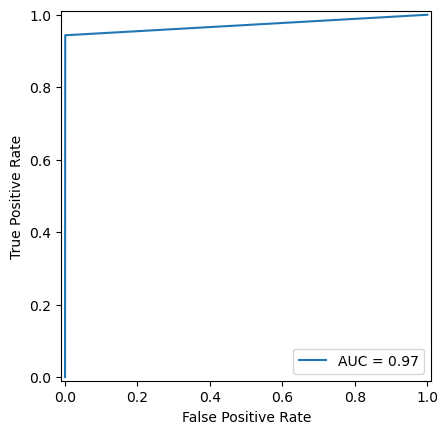

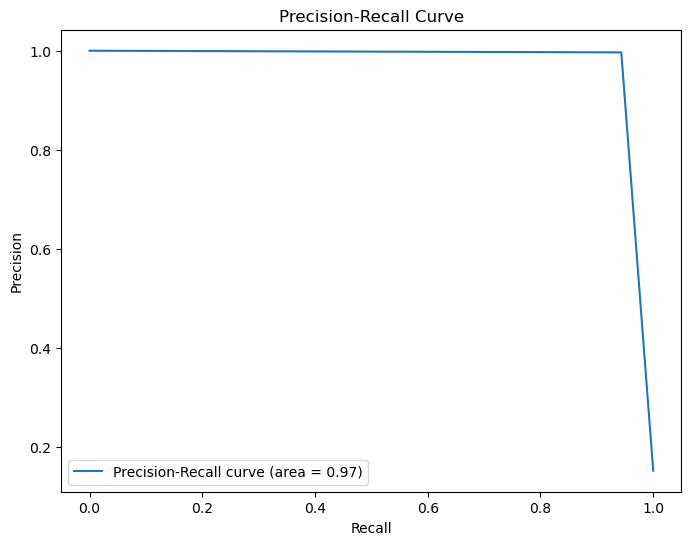

In [111]:
randomforest.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.991
Precision:	0.9909232729566712
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9488174194277695
Balanced Accuracy Score: 0.9713872893723853
Matthews Correlation Coefficient (MCC): 0.9644031204252231
AUC : 0.97139


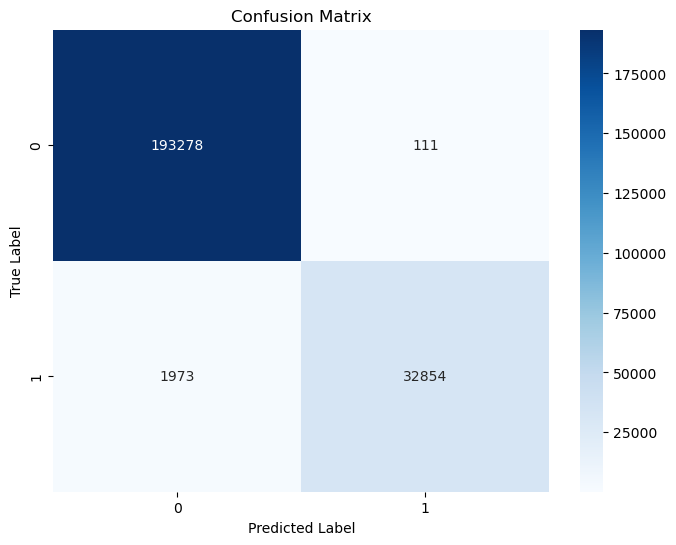

True Positives (TP): 32854
True Negatives (TN): 193278
False Positives (FP): 111
False Negatives (FN): 1973


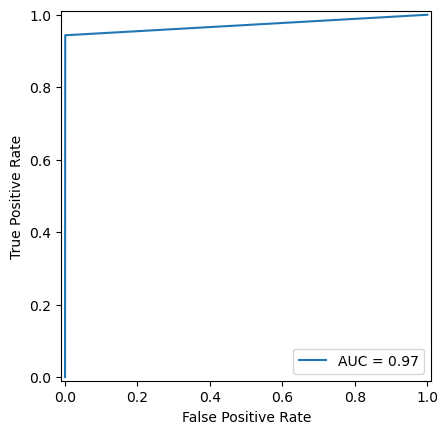

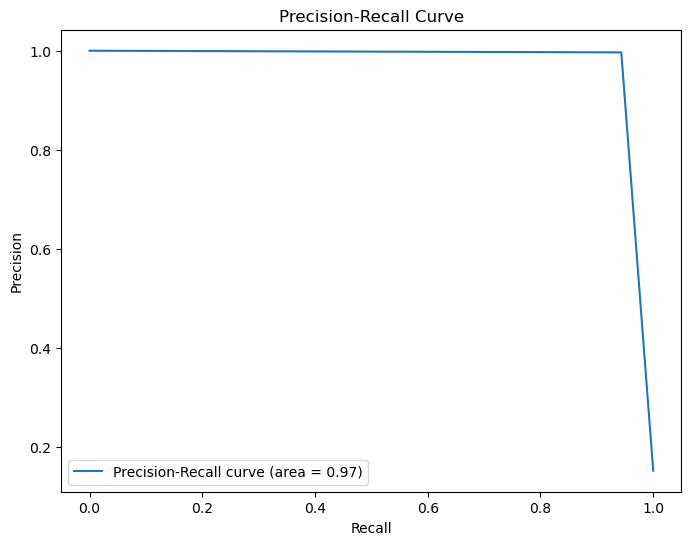

In [112]:
randomforest.fit(X_smote_train, y_smote_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.778
Precision:	0.9054224944585596
Recall:		0.778
F1-Score:	0.808
Average Precision Score: 0.4011041171661816
Balanced Accuracy Score: 0.8611845841756403
Matthews Correlation Coefficient (MCC): 0.5384291062638558
AUC : 0.86118


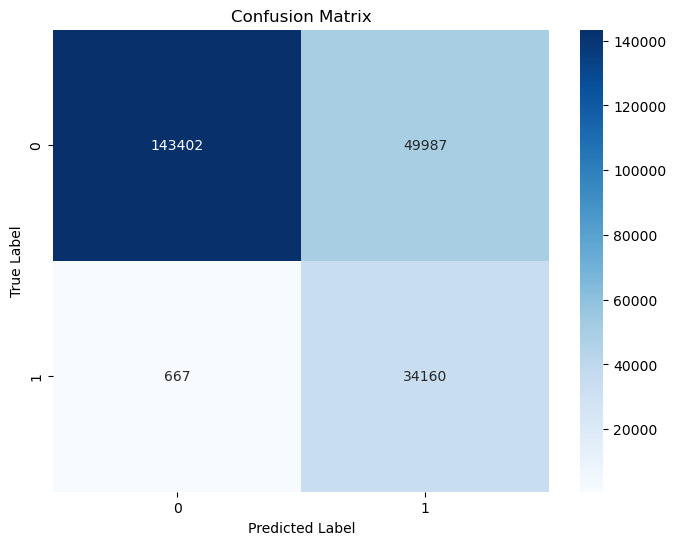

True Positives (TP): 34160
True Negatives (TN): 143402
False Positives (FP): 49987
False Negatives (FN): 667


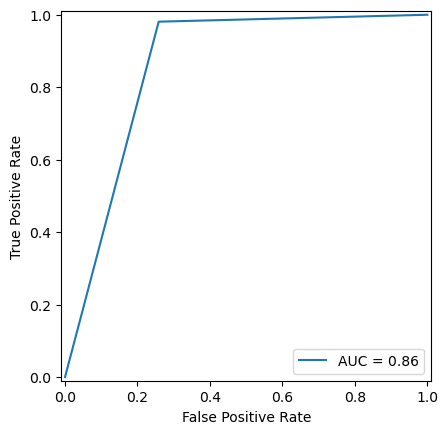

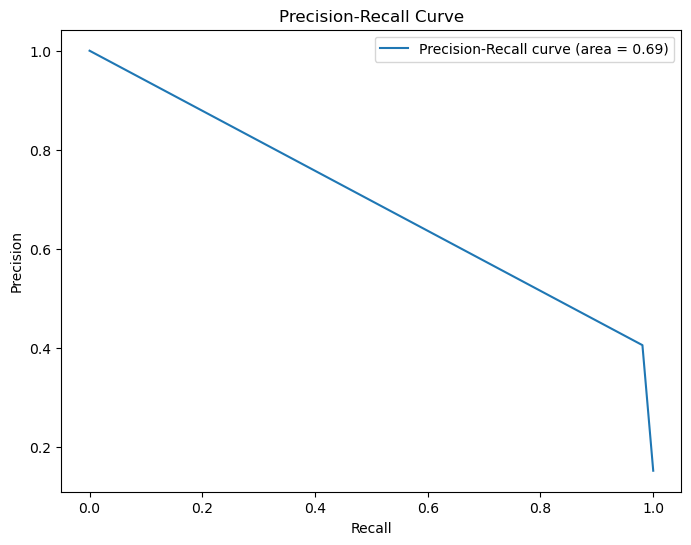

In [113]:
randomforest.fit(X_adasyn_train, y_adasyn_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

## KNN

In [114]:
# Declare KNN Model
knn = KNeighborsClassifier()

### Original Data

Accuracy:	0.991
Precision:	0.9912061643125889
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9506362360251609
Balanced Accuracy Score: 0.9710167272802273
Matthews Correlation Coefficient (MCC): 0.965412950196136
AUC : 0.97102


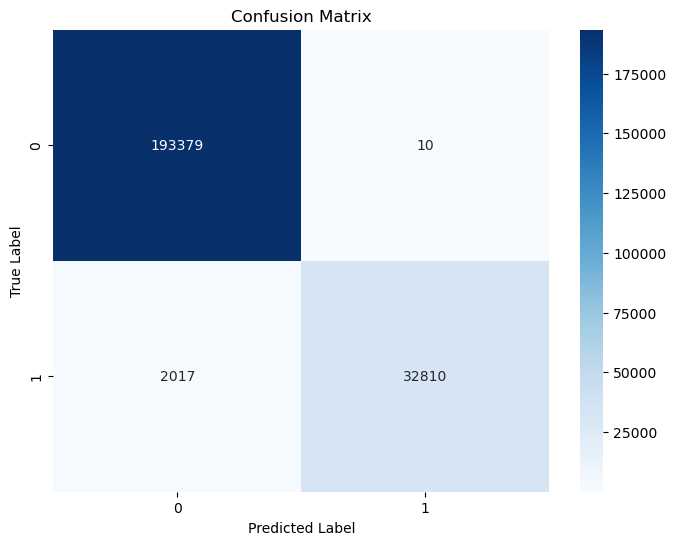

True Positives (TP): 32810
True Negatives (TN): 193379
False Positives (FP): 10
False Negatives (FN): 2017


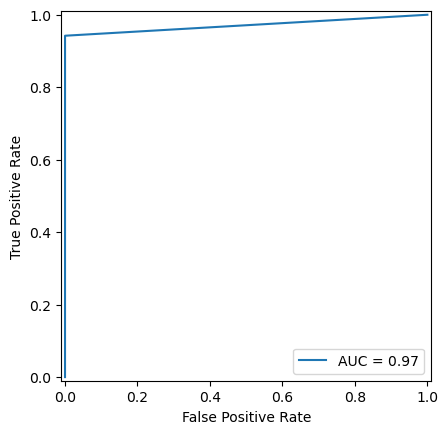

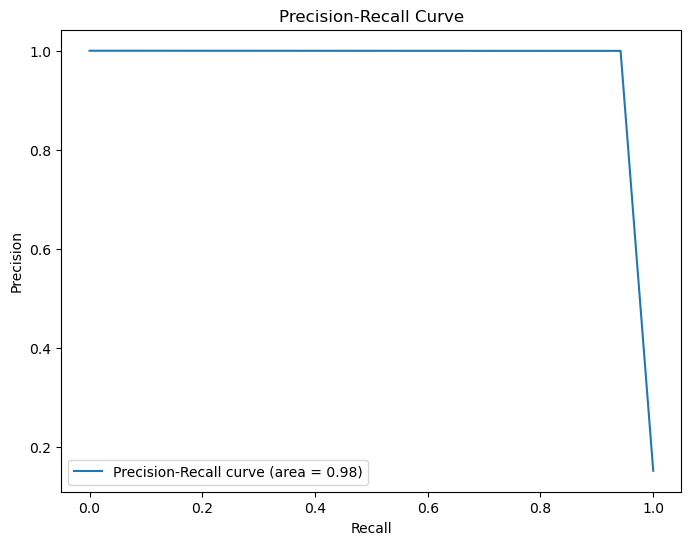

In [115]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.991
Precision:	0.9911588523727008
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9503450188565417
Balanced Accuracy Score: 0.9710026438704394
Matthews Correlation Coefficient (MCC): 0.9652372855487541
AUC : 0.97100


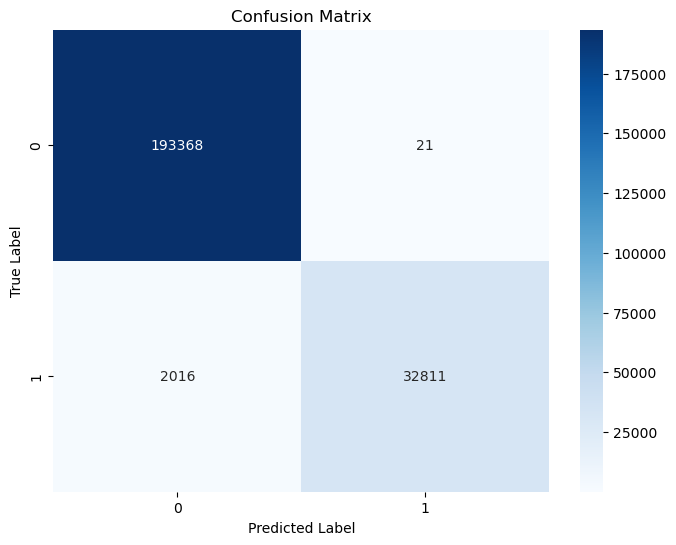

True Positives (TP): 32811
True Negatives (TN): 193368
False Positives (FP): 21
False Negatives (FN): 2016


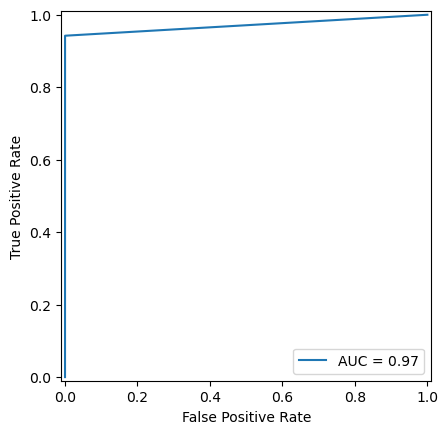

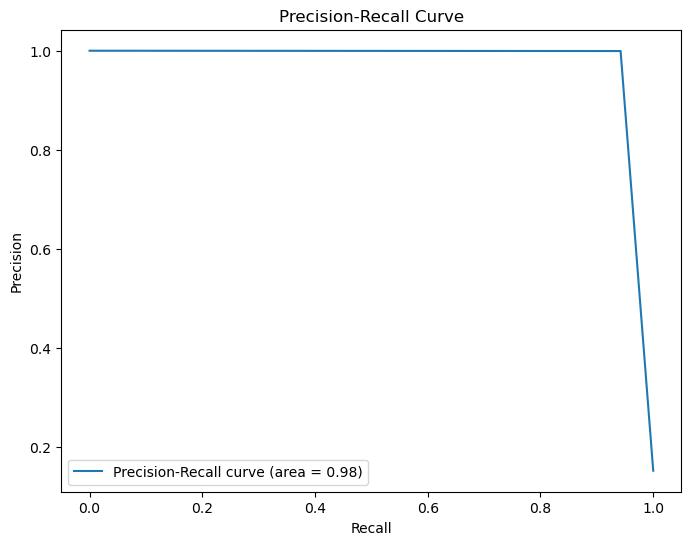

In [116]:
knn.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.991
Precision:	0.9912233384860083
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9507335621779431
Balanced Accuracy Score: 0.9710741539893897
Matthews Correlation Coefficient (MCC): 0.9654817038523889
AUC : 0.97107


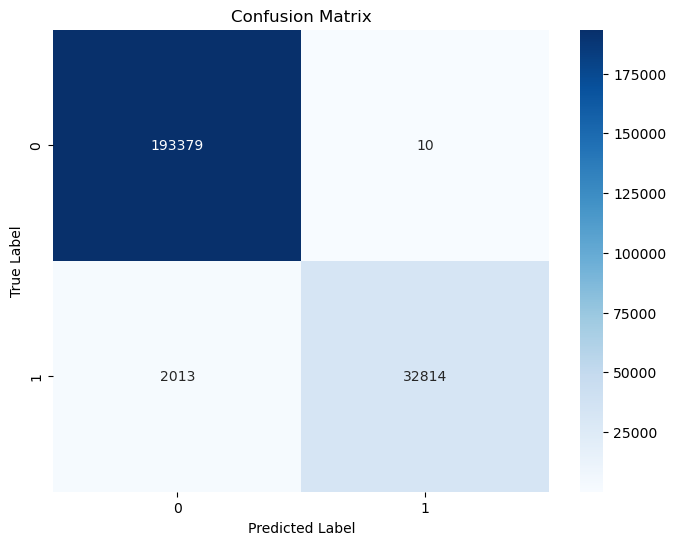

True Positives (TP): 32814
True Negatives (TN): 193379
False Positives (FP): 10
False Negatives (FN): 2013


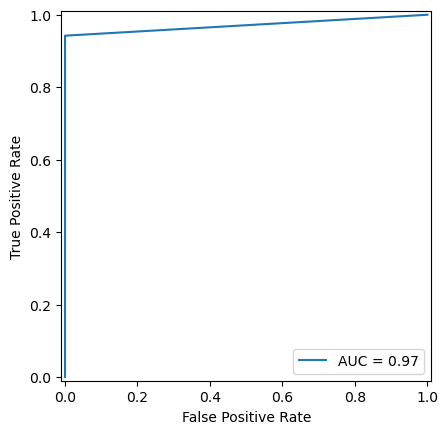

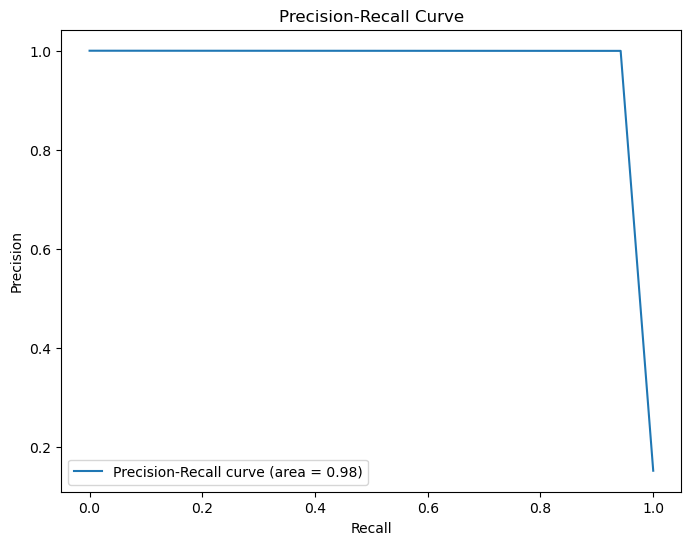

In [117]:
knn.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.991
Precision:	0.9912100586598982
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9506562041149734
Balanced Accuracy Score: 0.9710428551723468
Matthews Correlation Coefficient (MCC): 0.9654297917303533
AUC : 0.97104


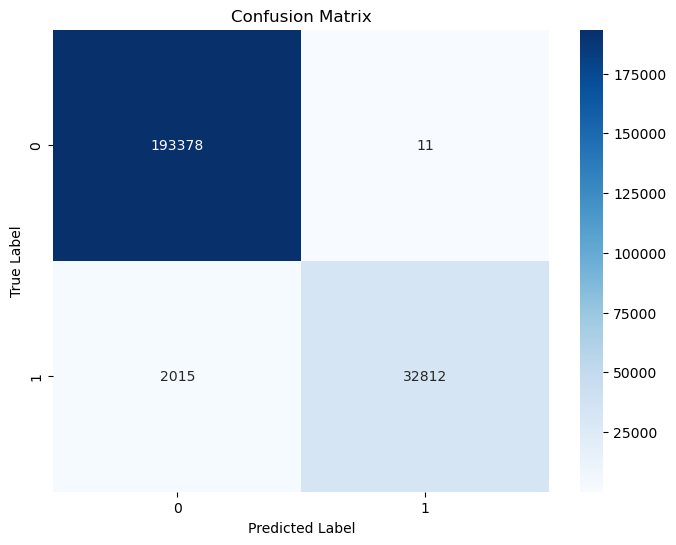

True Positives (TP): 32812
True Negatives (TN): 193378
False Positives (FP): 11
False Negatives (FN): 2015


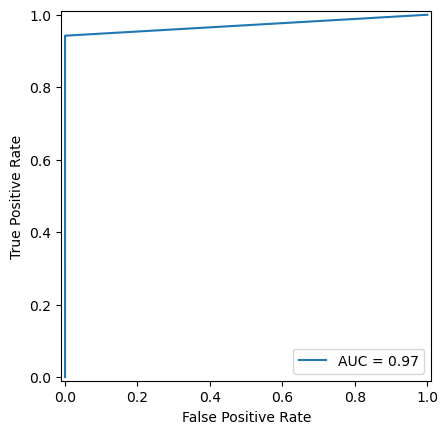

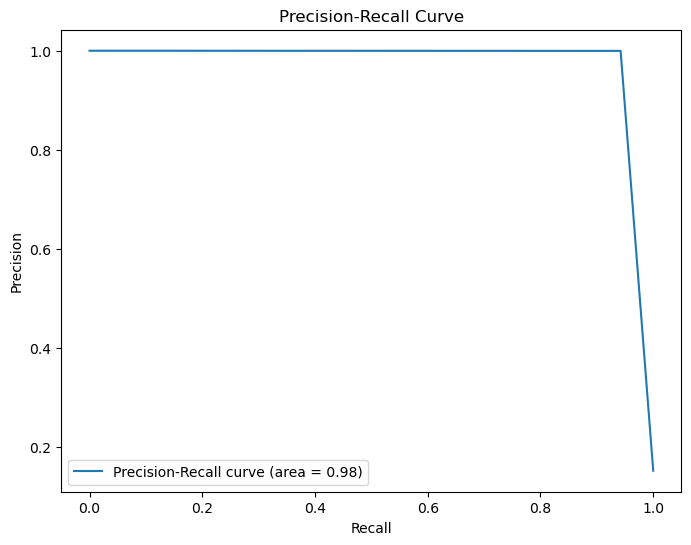

In [118]:
knn.fit(X_smote_train, y_smote_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.991
Precision:	0.9912147513116051
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9506848991015516
Balanced Accuracy Score: 0.9710454406348085
Matthews Correlation Coefficient (MCC): 0.9654473272844207
AUC : 0.97105


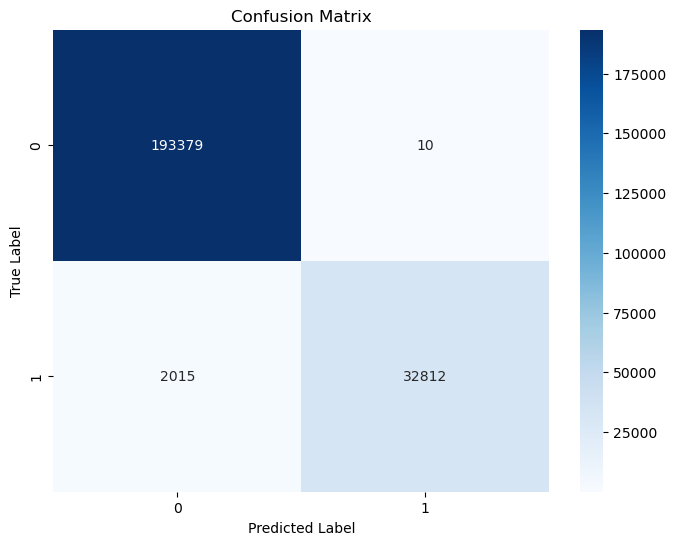

True Positives (TP): 32812
True Negatives (TN): 193379
False Positives (FP): 10
False Negatives (FN): 2015


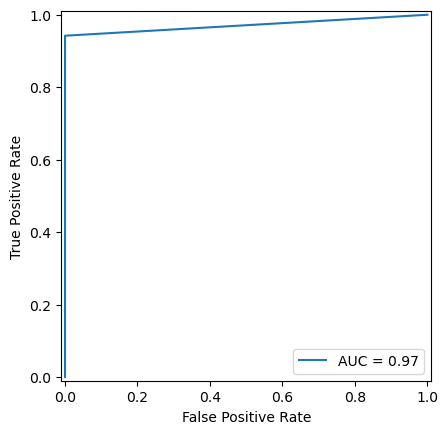

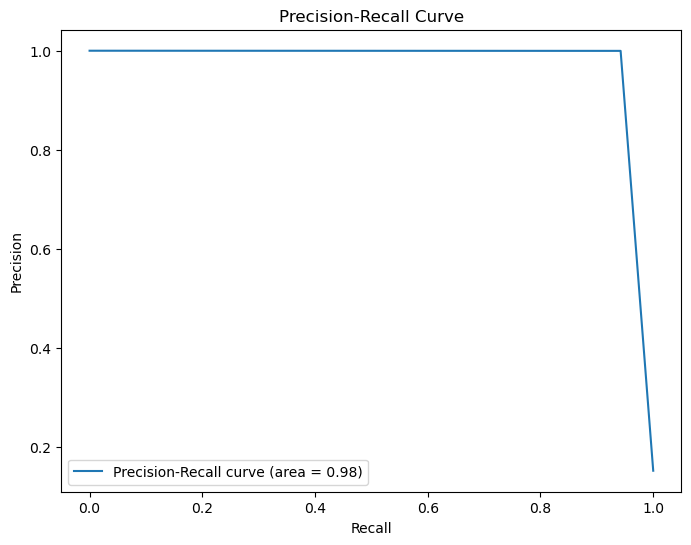

In [119]:
knn.fit(X_adasyn_train, y_adasyn_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)